# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='/home/flash/deep-reinforcement-learning/p2_continuous-control/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
num_agents = states.shape[0]
print(num_agents)
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
20
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:

#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
 #   actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
 #   actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
  #  env_info = env.step(actions)[brain_name]           # send all actions to tne environment
  #  next_states = env_info.vector_observations         # get next state (for each agent)
  #  rewards = env_info.rewards                         # get reward (for each agent)
  #  dones = env_info.local_done                        # see if episode finished
  #  scores += env_info.rewards                         # update the score (for each agent)
  #  states = next_states                               # roll over states to next time step
    #print(states)
   # if np.any(dones):                                  # exit loop if episode finished
    #    break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Episode 1, Mean last 100: 0.58, Mean current: 0.58, Max: 1.55, Min: 0.05, Len: 20020
Episode 2, Mean last 100: 1.06, Mean current: 1.53, Max: 3.11, Min: 0.38, Len: 40040
Episode 3, Mean last 100: 1.40, Mean current: 2.09, Max: 2.99, Min: 1.48, Len: 60060
Episode 4, Mean last 100: 1.90, Mean current: 3.38, Max: 5.58, Min: 1.33, Len: 80080
Episode 5, Mean last 100: 2.08, Mean current: 2.82, Max: 5.19, Min: 1.29, Len: 100100
Episode 6, Mean last 100: 2.33, Mean current: 3.60, Max: 5.77, Min: 1.58, Len: 120120
Episode 7, Mean last 100: 2.61, Mean current: 4.26, Max: 7.10, Min: 1.64, Len: 140140
Episode 8, Mean last 100: 2.78, Mean current: 3.97, Max: 9.39, Min: 0.76, Len: 160160
Episode 9, Mean last 100: 3.10, Mean current: 5.66, Max: 8.41, Min: 3.40, Len: 180180
Episode 10, Mean last 100: 3.44, Mean current: 6.55, Max: 11.17, Min: 2.44, Len: 200200
Episode 11, Mean last 100: 3.70, Mean current: 6.20, Max: 9.86, Min: 2.46, Len: 220220
Episode 12, Mean last 100: 3.91, Mean current: 6.27, Ma

Episode 93, Mean last 100: 10.90, Mean current: 16.56, Max: 27.22, Min: 0.00, Len: 1861860
Episode 94, Mean last 100: 10.95, Mean current: 15.94, Max: 20.39, Min: 9.80, Len: 1881880
Episode 95, Mean last 100: 10.99, Mean current: 14.67, Max: 20.61, Min: 2.21, Len: 1901900
Episode 96, Mean last 100: 11.06, Mean current: 17.36, Max: 29.19, Min: 12.65, Len: 1921920
Episode 97, Mean last 100: 11.12, Mean current: 17.61, Max: 24.10, Min: 8.98, Len: 1941940
Episode 98, Mean last 100: 11.18, Mean current: 16.64, Max: 23.81, Min: 11.88, Len: 1961960
Episode 99, Mean last 100: 11.23, Mean current: 16.70, Max: 21.74, Min: 12.56, Len: 1981980
Episode 100, Mean last 100: 11.29, Mean current: 17.16, Max: 27.78, Min: 8.19, Len: 2000000
Episode 100	Average Score: 11.29 score 17.16
Episode 101, Mean last 100: 11.47, Mean current: 18.60, Max: 25.56, Min: 14.29, Len: 2000000
Episode 102, Mean last 100: 11.64, Mean current: 18.06, Max: 30.19, Min: 12.29, Len: 2000000
Episode 103, Mean last 100: 11.81, Me

Episode 181, Mean last 100: 20.23, Mean current: 24.45, Max: 33.53, Min: 9.93, Len: 2000000
Episode 182, Mean last 100: 20.33, Mean current: 24.62, Max: 36.28, Min: 11.93, Len: 2000000
Episode 183, Mean last 100: 20.45, Mean current: 26.03, Max: 33.06, Min: 7.64, Len: 2000000
Episode 184, Mean last 100: 20.59, Mean current: 29.36, Max: 36.35, Min: 17.95, Len: 2000000
Episode 185, Mean last 100: 20.66, Mean current: 20.45, Max: 27.94, Min: 5.95, Len: 2000000
Episode 186, Mean last 100: 20.72, Mean current: 20.73, Max: 30.57, Min: 10.54, Len: 2000000
Episode 187, Mean last 100: 20.79, Mean current: 21.55, Max: 29.37, Min: 6.11, Len: 2000000
Episode 188, Mean last 100: 20.88, Mean current: 23.14, Max: 32.12, Min: 10.96, Len: 2000000
Episode 189, Mean last 100: 20.97, Mean current: 22.79, Max: 31.26, Min: 10.08, Len: 2000000
Episode 190, Mean last 100: 21.06, Mean current: 23.39, Max: 29.14, Min: 10.27, Len: 2000000
Episode 191, Mean last 100: 21.13, Mean current: 21.87, Max: 29.66, Min: 1

Episode 269, Mean last 100: 24.67, Mean current: 29.63, Max: 35.39, Min: 13.88, Len: 2000000
Episode 270, Mean last 100: 24.75, Mean current: 32.03, Max: 37.13, Min: 26.66, Len: 2000000
Episode 271, Mean last 100: 24.84, Mean current: 33.58, Max: 38.49, Min: 21.81, Len: 2000000
Episode 272, Mean last 100: 24.93, Mean current: 31.92, Max: 36.47, Min: 24.59, Len: 2000000
Episode 273, Mean last 100: 25.05, Mean current: 32.22, Max: 38.70, Min: 26.25, Len: 2000000
Episode 274, Mean last 100: 25.14, Mean current: 31.48, Max: 36.80, Min: 19.75, Len: 2000000
Episode 275, Mean last 100: 25.20, Mean current: 29.72, Max: 36.28, Min: 19.02, Len: 2000000
Episode 276, Mean last 100: 25.25, Mean current: 29.17, Max: 37.64, Min: 15.21, Len: 2000000
Episode 277, Mean last 100: 25.35, Mean current: 31.34, Max: 37.43, Min: 18.89, Len: 2000000
Episode 278, Mean last 100: 25.44, Mean current: 31.37, Max: 36.57, Min: 19.16, Len: 2000000
Episode 279, Mean last 100: 25.48, Mean current: 29.58, Max: 36.78, Mi

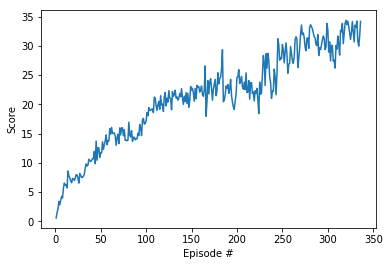

In [6]:
from collections import deque
from itertools import count
from ddpg_agent import Agent
import torch
import matplotlib.pyplot as plt

%matplotlib inline
agent = Agent(num_agents=20,state_size=33, action_size=4, random_seed=10)

def ddpg(n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    
    scores_all = []
    

    for i_episode in range(1, n_episodes+1):
        env_info  =  env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations 
        agent.reset()
        scores  = np.zeros(num_agents)####！!！!！
        
        for t in count():
            actions =agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done 
            scores += env_info.rewards
            #print(rewards)
            #print(num_agents)
            for i in range(num_agents):####!！!
                agent.step(t,states[i], actions[i], rewards[i], next_states[i], dones[i])
            
            if t % print_every == 0:
                print('\rStep {}\tAverage Score: {:.2f}'.format(t, np.mean(scores)), end="")
            if np.any(dones):
                break 
            states = env_info.vector_observations  
            
        score = scores.mean()#####！!！!
        scores_deque.append(score)
        scores_all.append(score)
        #print('\rEpisode {}\tAverage Score: {:.2f} score {:.2f}'.format(i_episode, np.mean(scores_deque),score1), end="")
        print('\rEpisode {}, Mean last 100: {:.2f}, Mean current: {:.2f}, Max: {:.2f}, Min: {:.2f}, Len: {}'\
              .format(i_episode, np.mean(scores_deque), score, np.max(scores), np.min(scores), len(agent.memory)), end="\n")
        if i_episode % print_every == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f} score {:.2f}'.format(i_episode, np.mean(scores_deque),score))
        if  np.mean(scores_deque)>=30 :   
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f} score {:.2f}'.format(i_episode, np.mean(scores_deque),score))
            break
    return scores_all

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
env.close()